# Question 8

In [58]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import OLSInfluence

from scipy.stats.stats import pearsonr   

import seaborn as sns

%matplotlib inline

In [123]:
df1 = pd.read_csv('./datasets/Auto.csv',na_values='?')
df1.horsepower = df1.horsepower.astype('float')

## Question 8.a

In [39]:
# 8.a:
# Linear model
# Create regression model between horsepower and mpg
lm1 = sm.OLS.from_formula('mpg ~ horsepower',data=df1)

results1 = lm1.fit()
print(results1.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Tue, 03 Jul 2018   Prob (F-statistic):           7.03e-81
Time:                        19:24:14   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     39.9359      0.717     55.660      0.0

Comments:   
A. Based on the results of the linear regression, the p-values of the slope suggests that there is a relationship between the two features.

In [40]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
mpg             397 non-null float64
cylinders       397 non-null int64
displacement    397 non-null float64
horsepower      392 non-null float64
weight          397 non-null int64
acceleration    397 non-null float64
year            397 non-null int64
origin          397 non-null int64
name            397 non-null object
dtypes: float64(4), int64(4), object(1)
memory usage: 28.0+ KB


In [54]:
# We now compute the mean of the response and the RSE
mean_res = df1.mpg.mean()
RSE = np.sqrt(np.sum(np.square(results1.resid))/(len(df1.horsepower-2)))
print('Mean = '+ str(mean_res))
print('RSE = ' + str(RSE))
print('% of mean not-covered = ' + str(RSE/mean_res))

Mean = 23.515869017632248
RSE = 4.862314826382853
% of mean not-covered = 0.20676738855523813


B. The R^2 value is 0.606, this implies that 61% of the variance of the response is explained by the feature horsepower.

In [47]:
len(df1.horsepower)

397

In [77]:
# Compute correlation
np.corrcoef(df1['horsepower'].values,df1['mpg'].values)

array([[nan, nan],
       [nan,  1.]])

In [80]:
df1[['horsepower','mpg']].corr()

,horsepower,mpg
horsepower,1.000000,-0.778427
mpg,-0.778427,1.000000


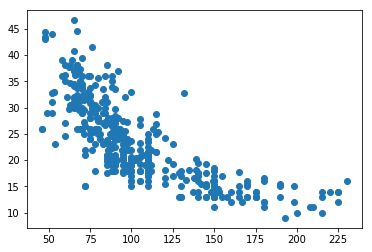

In [65]:
plt.scatter(df1.horsepower.values, df1.mpg.values)

C. Based on the slope of the regression and the correlation coefficien, it appears that the mpg is negatively correlated with the horsepower.

In [85]:
# Make prediction but display confidence interval
def predict_with_conf(lm, record):
    '''
    Make a prediction using a linear regression model (already fit) on a new record.
    '''

    # Make prediction
    pred = pd.DataFrame(lm.predict(record),columns=['fit'])
    
    # Obtain confidence interval
    ci = lm.conf_int().rename(columns={0:'lwr',1:'upr'})
    
    # Apply confidence intervall to prediction
    ci = record.dot(ci)
    
    return pd.concat([pred,ci],axis=1)

In [86]:
horserpower_test = pd.DataFrame([[1,98]], columns=['Intercept','horsepower'])
predict = predict_with_conf(results1,horserpower_test)
predict

,fit,lwr,upr
0,24.467077,21.814545,27.119609


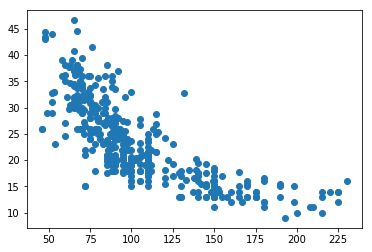

In [65]:
plt.scatter(df1.horsepower.values, df1.mpg.values)

## Question 8.b

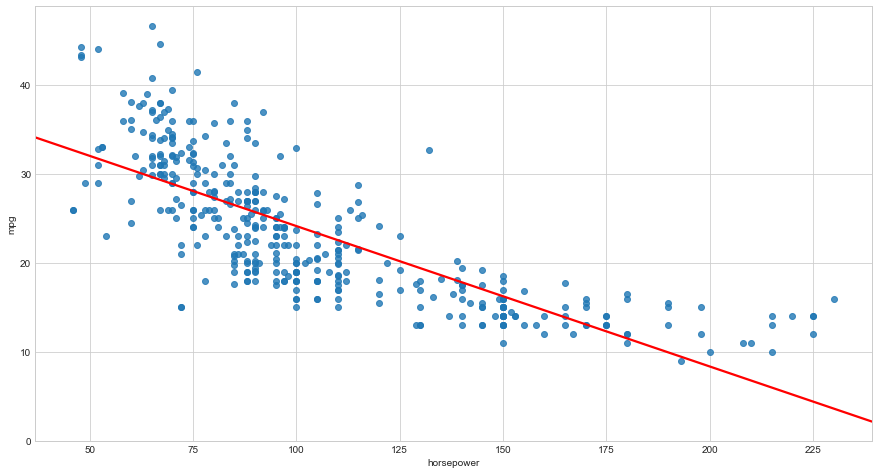

In [88]:
# 8.b
# Plot the regression
sns.set_style("whitegrid")
plt.figure(figsize=(15,8))
sns.regplot('horsepower','mpg',df1,line_kws = {"color":"r"}, ci=None);

## Question 8.c

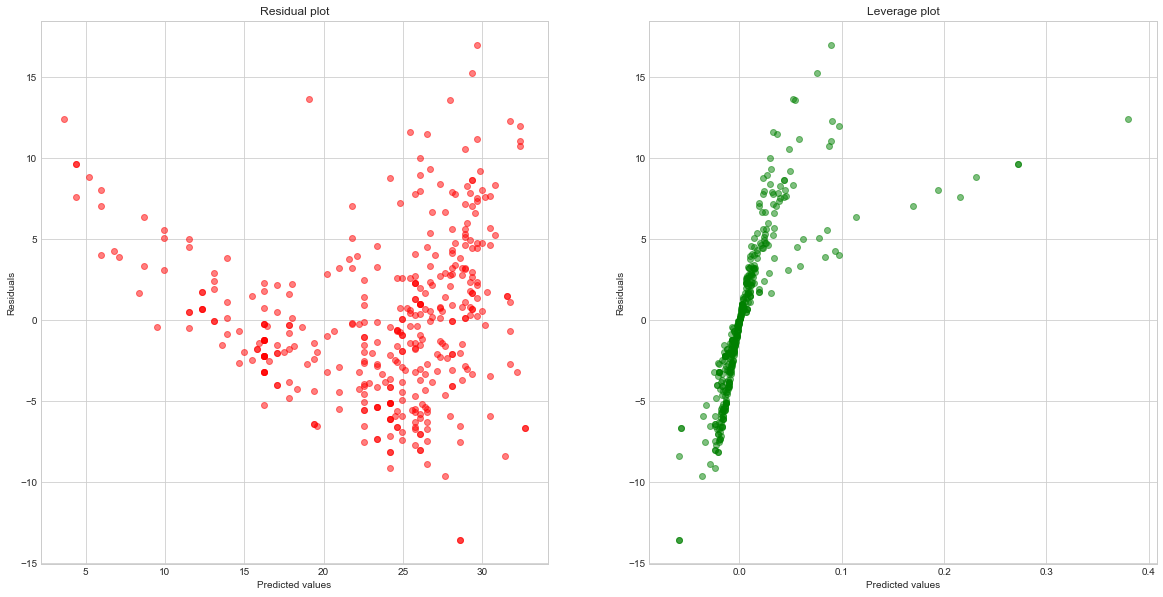

In [104]:
# 8.c
f = plt.figure(figsize=(20,10))

# Plot residual plot
ax = f.add_subplot(121)
fit_values = pd.Series(results1.fittedvalues,name='Fitted')
residuals = pd.Series(results1.resid,name='Residuals')
ax.set_xlabel('Predicted values')
ax.set_ylabel('Residuals')
ax.set_title('Residual plot')
ax.scatter(fit_values,residuals,alpha=0.5,c='r');

# Plot leverage plot
ax2 = f.add_subplot(122)
leverage = pd.Series(OLSInfluence(results1).influence, name = "Leverage")
ax2.scatter(leverage,residuals,alpha=0.5,c='g');
ax2.set_xlabel('Predicted values')
ax2.set_ylabel('Residuals')
ax2.set_title('Leverage plot');

Based on the residuals plots, there is some evidence of non-linearity. Indeed, the residual plot shows a trend similar to the one of a second-order polynomial plot.

# Question 9

## Question 9.a

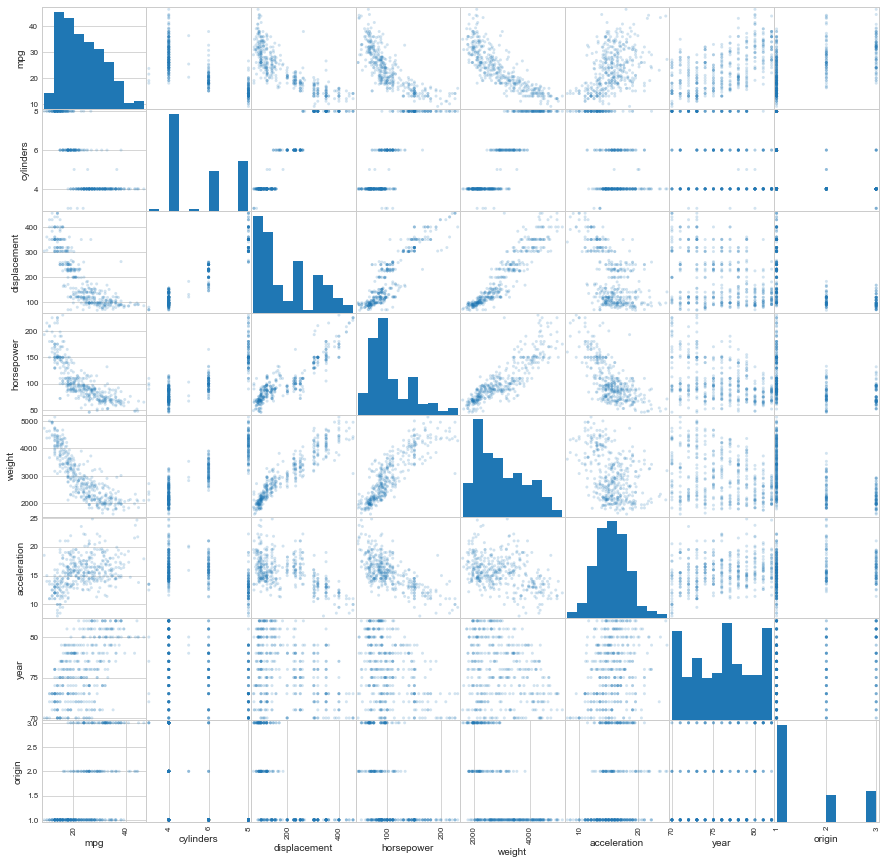

In [105]:
# Plot feature relationships
axes = pd.plotting.scatter_matrix(df1, alpha=0.2, figsize=(15,15))

## Question 9.b

In [124]:
# Compute correlation matrix
corr = df1.corr()
corr

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.776260,-0.804443,-0.778427,-0.831739,0.422297,0.581469,0.563698
cylinders,-0.776260,1.000000,0.950920,0.842983,0.897017,-0.504061,-0.346717,-0.564972
displacement,-0.804443,0.950920,1.000000,0.897257,0.933104,-0.544162,-0.369804,-0.610664
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.831739,0.897017,0.933104,0.864538,1.000000,-0.419502,-0.307900,-0.581265
acceleration,0.422297,-0.504061,-0.544162,-0.689196,-0.419502,1.000000,0.282901,0.210084
year,0.581469,-0.346717,-0.369804,-0.416361,-0.307900,0.282901,1.000000,0.184314
origin,0.563698,-0.564972,-0.610664,-0.455171,-0.581265,0.210084,0.184314,1.000000


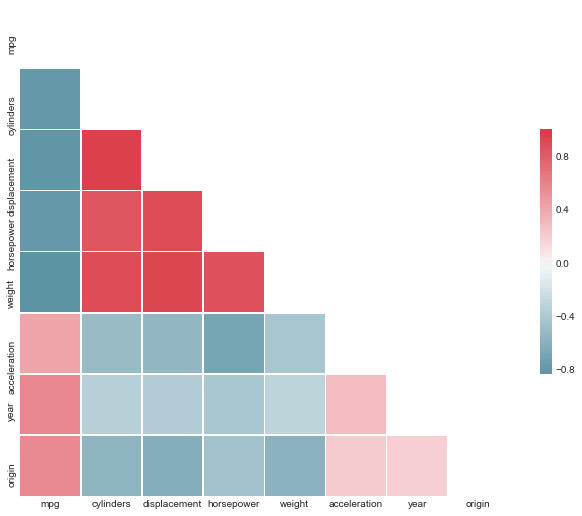

In [125]:
# Plot correlation matrix
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

## Question 9.c

In [126]:
# Create regression model between mpg and all the others features but names
lm2 = sm.OLS.from_formula('mpg ~' + '+'.join(df1.columns.difference(['mpg','name'])),data=df1)
results2 = lm2.fit()
print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Tue, 03 Jul 2018   Prob (F-statistic):          2.04e-139
Time:                        20:21:37   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -17.2184      4.644     -3.707   

9.c.i. There is a clear relatioship between the predictors and the mpg . The F -statistic is far from 1 (with a small p-value), indicating evidence against the null hypothesis.   
9.c.ii. Inspecting the p-values resulting from the regression, it appears that the displacement, horsepower, origin, and weight have a statistically significant relationship with the predicted feature.   
9.c.iii. The regression coefficient associated to the year is 0.7508. It implies that for every year, the mpg increase by 0.7508. Recent cars are more fuel-efficient.

## Question 9.d

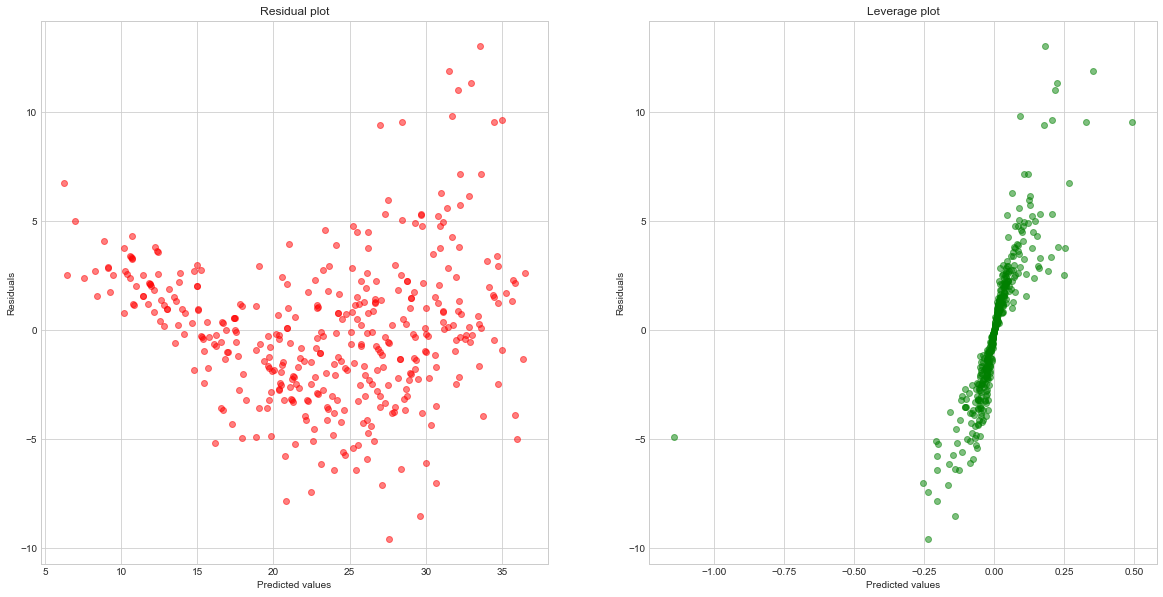

In [128]:
f = plt.figure(figsize=(20,10))

# Plot residual plot
ax = f.add_subplot(121)
fit_values = pd.Series(results2.fittedvalues,name='Fitted')
residuals = pd.Series(results2.resid,name='Residuals')
ax.set_xlabel('Predicted values')
ax.set_ylabel('Residuals')
ax.set_title('Residual plot')
ax.scatter(fit_values,residuals,alpha=0.5,c='r');

# Plot leverage plot
ax2 = f.add_subplot(122)
leverage = pd.Series(OLSInfluence(results2).influence, name = "Leverage")
ax2.scatter(leverage,residuals,alpha=0.5,c='g');
ax2.set_xlabel('Predicted values')
ax2.set_ylabel('Residuals')
ax2.set_title('Leverage plot');

There is a curve pattern in the residual plot leading to the assumption that the model is not purely linear.

## Question 9.e

In [134]:
# Create regression model between mpg displacement, origin, weight, and year
lm3 = sm.OLS.from_formula('mpg ~ cylinders*displacement+displacement*weight',data=df1)
results3 = lm3.fit()
print(results3.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.727
Model:                            OLS   Adj. R-squared:                  0.723
Method:                 Least Squares   F-statistic:                     208.2
Date:                Tue, 03 Jul 2018   Prob (F-statistic):          7.95e-108
Time:                        20:30:55   Log-Likelihood:                -1122.0
No. Observations:                 397   AIC:                             2256.
Df Residuals:                     391   BIC:                             2280.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 52

From the obtained p-values, we can conclude that the interaction between displacement and weight is statistically signifcant, while the interactiion between cylinders and displacement is not.

## Question 9.f

In [138]:
lm3 = sm.OLS.from_formula('mpg ~ np.log(weight)+np.sqrt(horsepower)+acceleration+np.square(acceleration)',data=df1)
print(lm3.fit().summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     277.3
Date:                Tue, 03 Jul 2018   Prob (F-statistic):          3.26e-112
Time:                        20:48:27   Log-Likelihood:                -1096.1
No. Observations:                 392   AIC:                             2202.
Df Residuals:                     387   BIC:                             2222.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

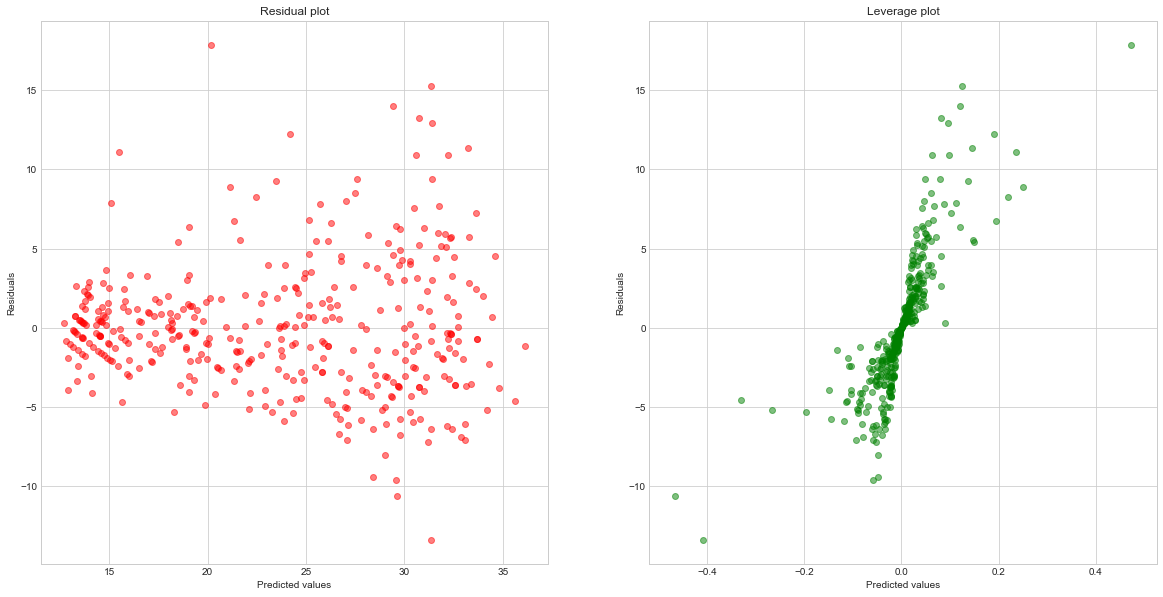

In [139]:
f = plt.figure(figsize=(20,10))

# Plot residual plot
ax = f.add_subplot(121)
fit_values = pd.Series(results3.fittedvalues,name='Fitted')
residuals = pd.Series(results3.resid,name='Residuals')
ax.set_xlabel('Predicted values')
ax.set_ylabel('Residuals')
ax.set_title('Residual plot')
ax.scatter(fit_values,residuals,alpha=0.5,c='r');

# Plot leverage plot
ax2 = f.add_subplot(122)
leverage = pd.Series(OLSInfluence(results3).influence, name = "Leverage")
ax2.scatter(leverage,residuals,alpha=0.5,c='g');
ax2.set_xlabel('Predicted values')
ax2.set_ylabel('Residuals')
ax2.set_title('Leverage plot');

The R2 value has increased and all the regression terms are statistically significant. The residual plot shows no particular trend.

# Question 10 

## Question 10.a

In [141]:
df2 = pd.read_csv('./datasets/Carseats.csv')
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 12 columns):
Unnamed: 0     400 non-null int64
Sales          400 non-null float64
CompPrice      400 non-null int64
Income         400 non-null int64
Advertising    400 non-null int64
Population     400 non-null int64
Price          400 non-null int64
ShelveLoc      400 non-null object
Age            400 non-null int64
Education      400 non-null int64
Urban          400 non-null object
US             400 non-null object
dtypes: float64(1), int64(8), object(3)
memory usage: 37.6+ KB


In [143]:
lm3 = sm.OLS.from_formula('Sales~ Price + Urban + US',data=df2)
print(lm3.fit().summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     41.52
Date:                Tue, 03 Jul 2018   Prob (F-statistic):           2.39e-23
Time:                        20:53:15   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1863.
Df Residuals:                     396   BIC:                             1879.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       13.0435      0.651     20.036   

## Question 10.b   
Urban[T.Yes] represents the coefficient associated to a "Yes" value of the Urban field. The model suggests a negative correlation between Urban="Yes" and the Sales value.   
US[T.Yes] represents the coefficient associated to a "Yes" value of the US field. The model suggests a positive correlation between US="Yes" and the Sales value.

## Qestion 10.c

The equation of the model can be written as:   
   
   Sales = 13.0435 -0.0219xUrban("Yes") + 1.2006xUS("Yes") -0.0545xPrice

## Question 10.d   
   
Based on the study of the p-values of the components of the regression, the nulle hypothesis (Contribution is null) can be rejected for US[T.Yes] and Price.

## Question 10.e

In [145]:
lm4 = sm.OLS.from_formula('Sales~ Price + US',data=df2)
results4 = lm4.fit()
print(results4.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     62.43
Date:                Tue, 03 Jul 2018   Prob (F-statistic):           2.66e-24
Time:                        21:02:29   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1861.
Df Residuals:                     397   BIC:                             1873.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.0308      0.631     20.652      0.0

## Question 10.f

Based on the R^2 value of the two models, both fit the data similarly, with linear regression from (e) fitting the data slightly better based on the F-statistic.

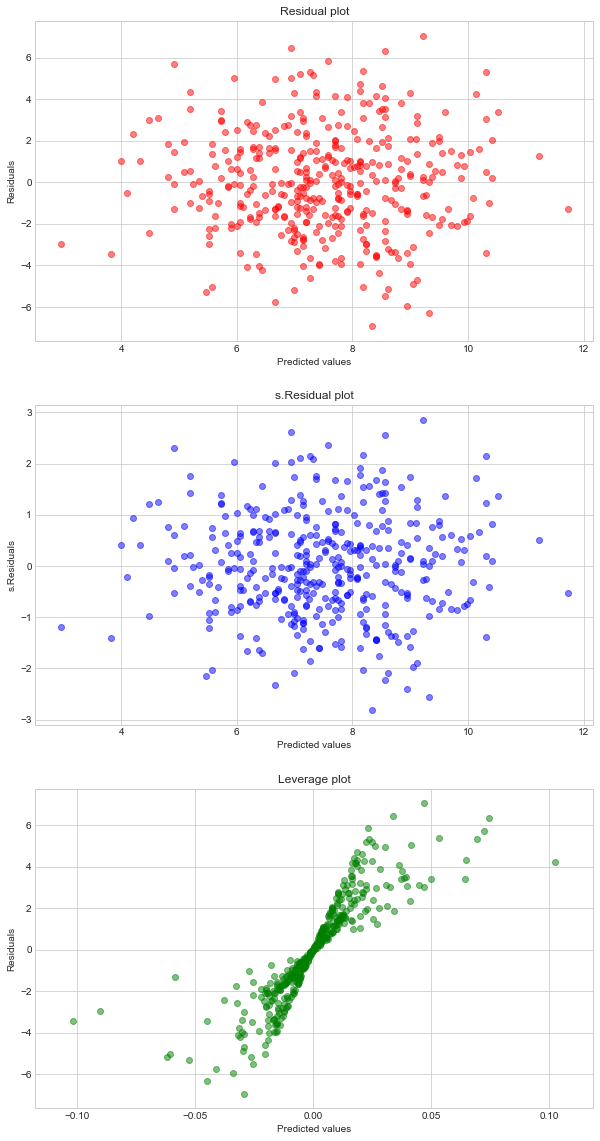

In [153]:
f = plt.figure(figsize=(10,20))

# Plot residual plot
ax = f.add_subplot(311)
fit_values = pd.Series(results4.fittedvalues,name='Fitted')
residuals = pd.Series(results4.resid,name='Residuals')
ax.set_xlabel('Predicted values')
ax.set_ylabel('Residuals')
ax.set_title('Residual plot')
ax.scatter(fit_values,residuals,alpha=0.5,c='r');

# Plot s.residual plot
ax3 = f.add_subplot(312)
s_residuals = pd.Series(results4.resid_pearson, name="S. Residuals")
ax3.set_xlabel('Predicted values')
ax3.set_ylabel('s.Residuals')
ax3.set_title('s.Residual plot')
ax3.scatter(fit_values,s_residuals,alpha=0.5,c='b');

# Plot leverage plot
ax2 = f.add_subplot(313)
leverage = pd.Series(OLSInfluence(results4).influence, name = "Leverage")
ax2.scatter(leverage,residuals,alpha=0.5,c='g');
ax2.set_xlabel('Predicted values')
ax2.set_ylabel('Residuals')
ax2.set_title('Leverage plot');

Based on the evaluation of the residual plot, no outlier appear in the set.
A few points with high leverage are identified.

# Question 11
## Question 11.a

In [187]:
# Generate x and y sets
np.random.seed(1)
x = np.random.normal(loc=0.0, scale=1.0, size=(100,))
y = 2*x + np.random.normal(loc=0.0, scale=1.0, size=(100,))
data = pd.DataFrame({'x':x.tolist(),'y':y.tolist()})
data.head()

,x,y
0,1.624345,2.801562
1,-0.611756,0.000995
2,-0.528172,-0.652852
3,-1.072969,-1.552359
4,0.865408,0.635903


In [190]:
# Perform regression on samples
lm = sm.OLS.from_formula('y ~ x+0',data=data)
results = lm.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     391.7
Date:                Tue, 03 Jul 2018   Prob (F-statistic):           3.46e-36
Time:                        21:25:12   Log-Likelihood:                -135.67
No. Observations:                 100   AIC:                             273.3
Df Residuals:                      99   BIC:                             275.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x              2.1067      0.106     19.792      0.0

There is a strong correlation between x and y as expected. The p-value is small and we can reject the null hypothesis.

In [191]:
# Perform regression on samples
lm = sm.OLS.from_formula('x ~ y+0',data=data)
results = lm.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      x   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     391.7
Date:                Tue, 03 Jul 2018   Prob (F-statistic):           3.46e-36
Time:                        21:26:25   Log-Likelihood:                -49.891
No. Observations:                 100   AIC:                             101.8
Df Residuals:                      99   BIC:                             104.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
y              0.3789      0.019     19.792      0.0

To be continued...